In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1 Data Loading


In [3]:
df = pd.read_csv('DataSet/Heart_disease.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,NaN
2,No,NaN,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
# Age category might as well be a numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16859 entries, 0 to 16858
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      16859 non-null  object 
 1   BMI               15255 non-null  float64
 2   Smoking           16859 non-null  object 
 3   AlcoholDrinking   16859 non-null  object 
 4   Stroke            16859 non-null  object 
 5   PhysicalHealth    16859 non-null  int64  
 6   MentalHealth      16859 non-null  int64  
 7   DiffWalking       16854 non-null  object 
 8   Sex               16859 non-null  object 
 9   AgeCategory       16859 non-null  object 
 10  Race              16859 non-null  object 
 11  Diabetic          16859 non-null  object 
 12  PhysicalActivity  16859 non-null  object 
 13  GenHealth         16859 non-null  object 
 14  SleepTime         16355 non-null  float64
 15  Asthma            16859 non-null  object 
 16  KidneyDisease     16859 non-null  object

In [5]:
df.shape

(16859, 18)

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,15255.000000,16859.000000,16859.000000,16355.000000
mean,28.380571,3.840085,3.867015,7.138490
std,6.410818,8.382590,7.962250,1.519619
min,12.400000,0.000000,0.000000,1.000000
25%,23.990000,0.000000,0.000000,6.000000
50%,27.390000,0.000000,0.000000,7.000000
75%,31.620000,2.000000,3.000000,8.000000
max,83.000000,30.000000,30.000000,24.000000


In [7]:
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns

In [8]:
# Only three features have missing values
df.isnull().sum()

HeartDisease           0
BMI                 1604
Smoking                0
AlcoholDrinking        0
Stroke                 0
PhysicalHealth         0
MentalHealth           0
DiffWalking            5
Sex                    0
AgeCategory            0
Race                   0
Diabetic               0
PhysicalActivity       0
GenHealth              0
SleepTime            504
Asthma                 0
KidneyDisease          0
SkinCancer          1164
dtype: int64

# Part 2 EDA


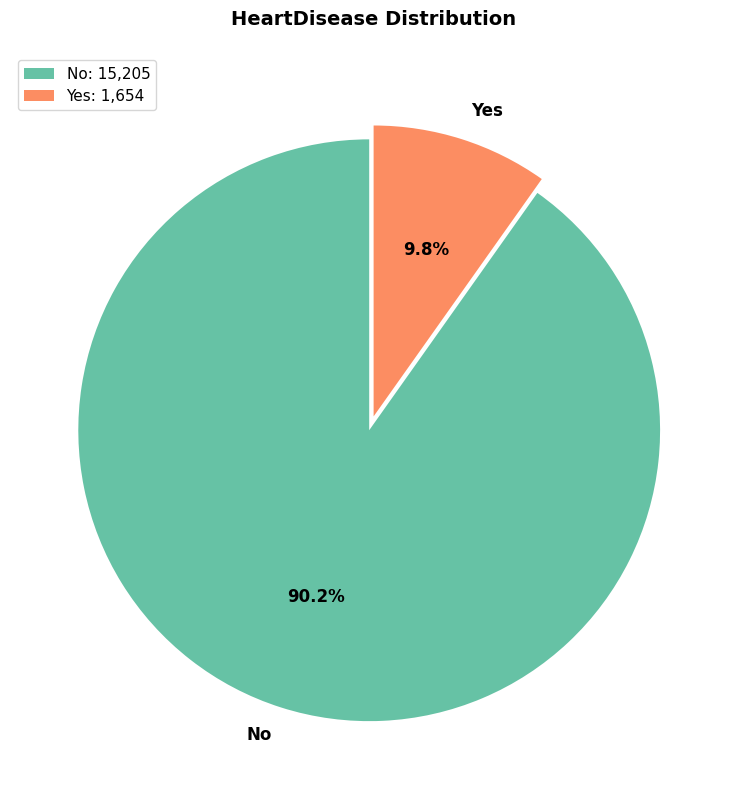

In [9]:
class_counts = df['HeartDisease'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

colors = ['#66c2a5', '#fc8d62']
explode = (0.05, 0)


if not class_counts.empty and len(class_counts) == len(explode):
    wedges, texts, autotexts = ax.pie(
        class_counts,
        labels=class_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        textprops={'fontsize': 12, 'fontweight': 'bold'}
    )

    ax.set_title('HeartDisease Distribution', fontsize=14, fontweight='bold', pad=20)

    # Add legend with counts
    legend_labels = [f'{label}: {count:,}' for label, count in class_counts.items()]
    ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(0, 1), fontsize=11)
    plt.tight_layout()
    plt.show()

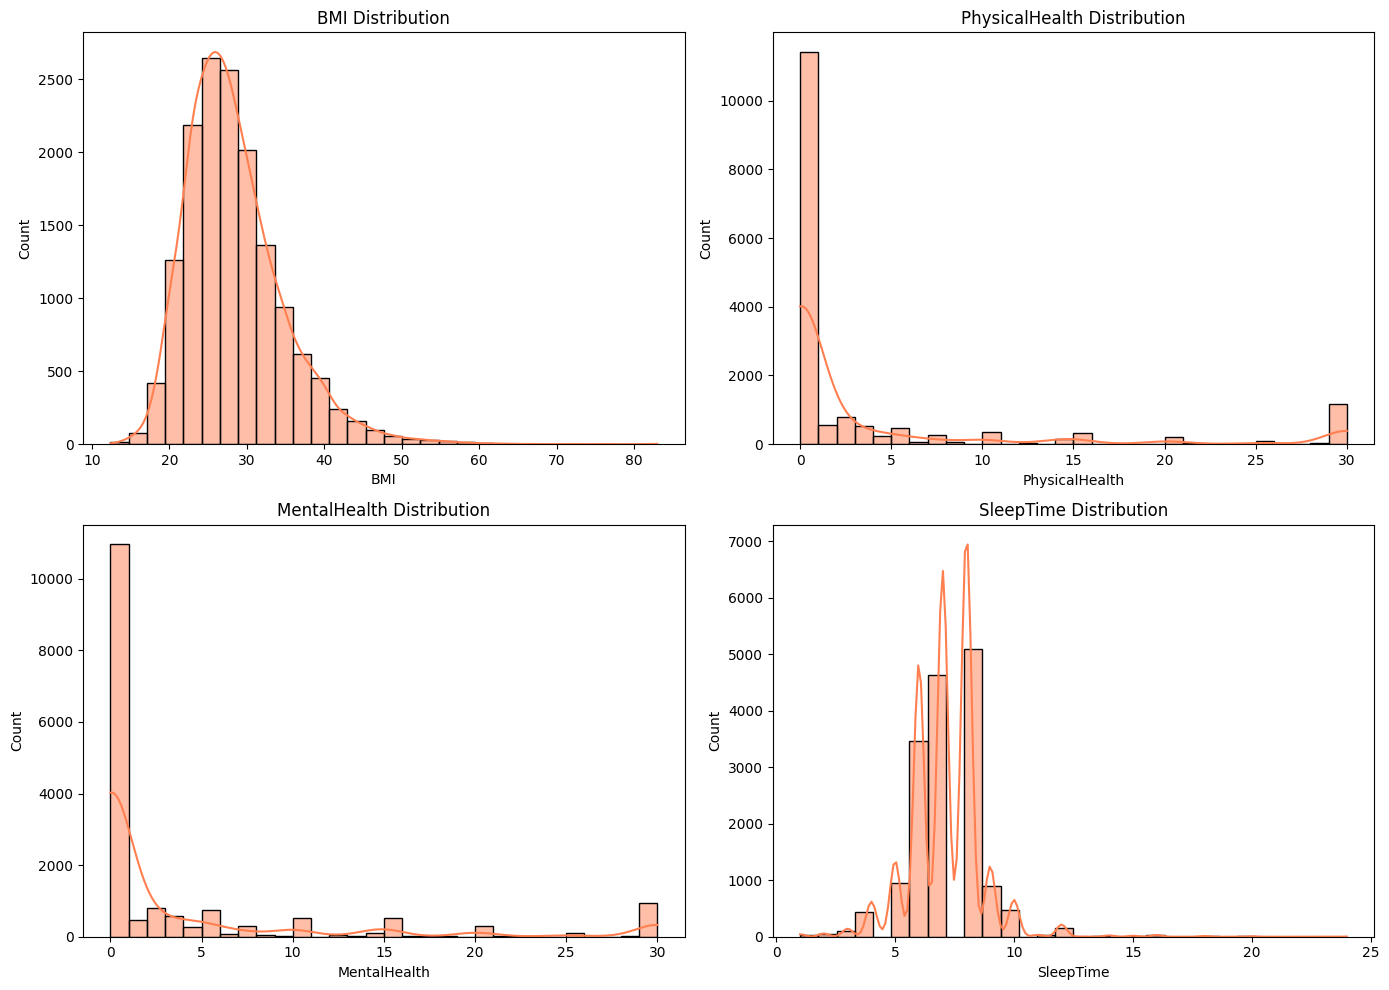

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, ax=axes[i], color='coral', kde=True)
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

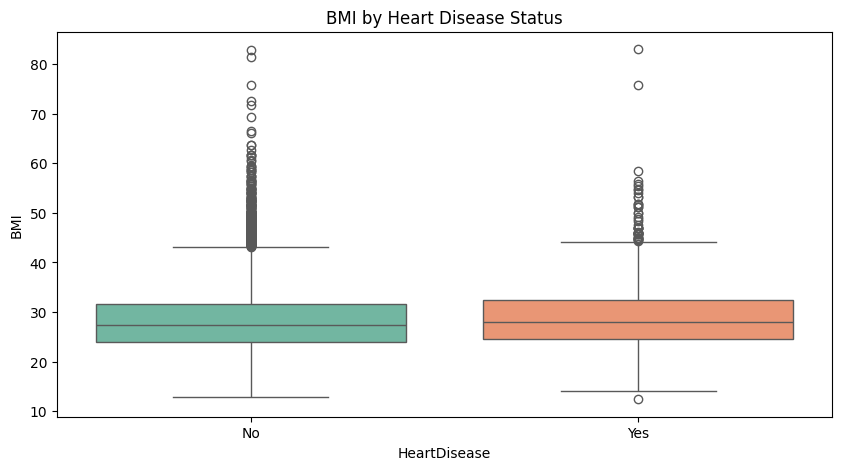

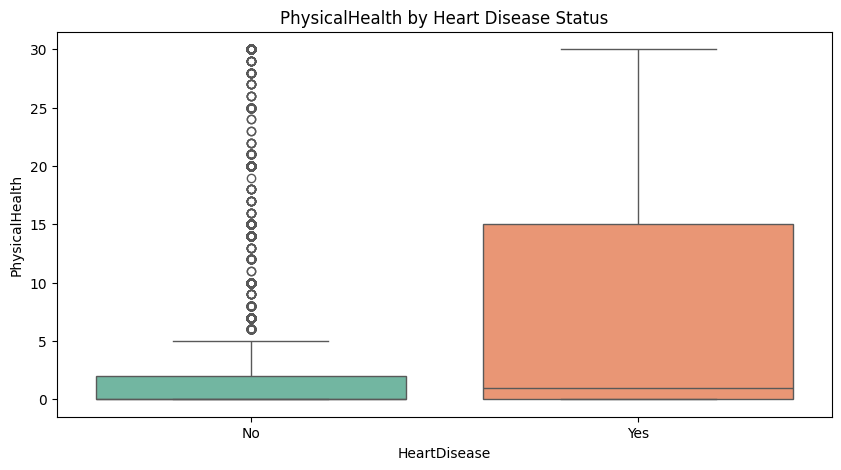

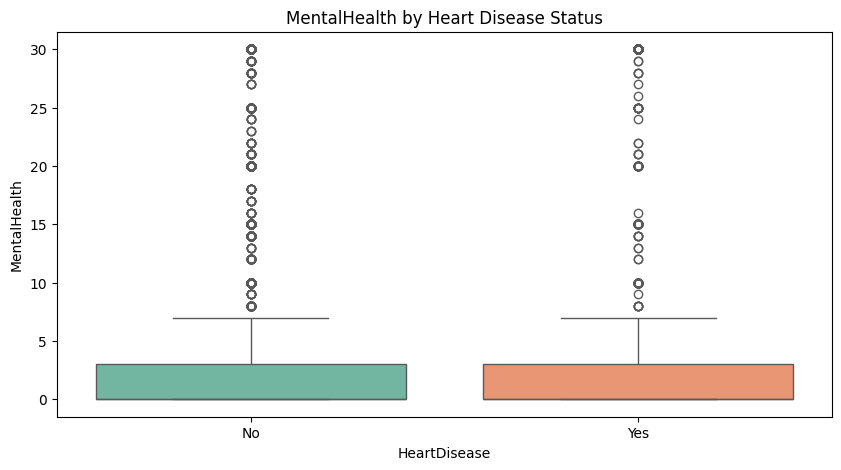

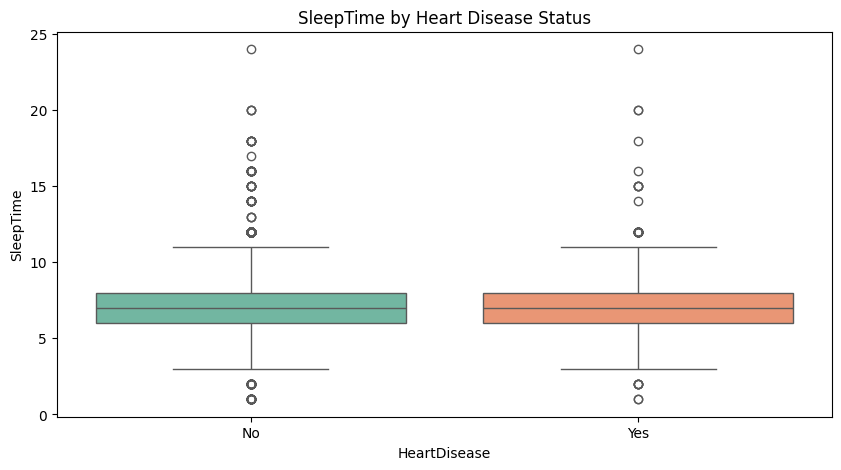

In [11]:
for col in numerical_features:
  fig, ax = plt.subplots(figsize=(10,5))
  sns.boxplot(data=df, x='HeartDisease', y=col, hue='HeartDisease', ax=ax, palette='Set2', legend=False)
  ax.set_title(f'{col} by Heart Disease Status')
  plt.show()

# **This dataset sucks severly imbalanced look at that chart dam! also we got tons of outliers might need to consider either removing them or using robust scaling**


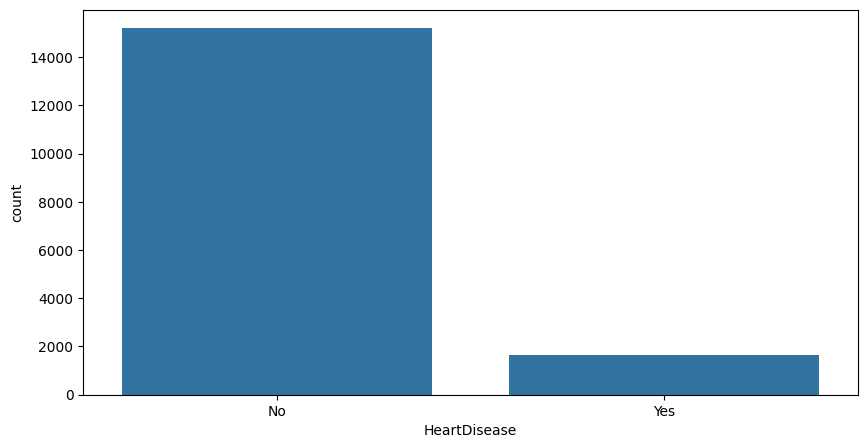

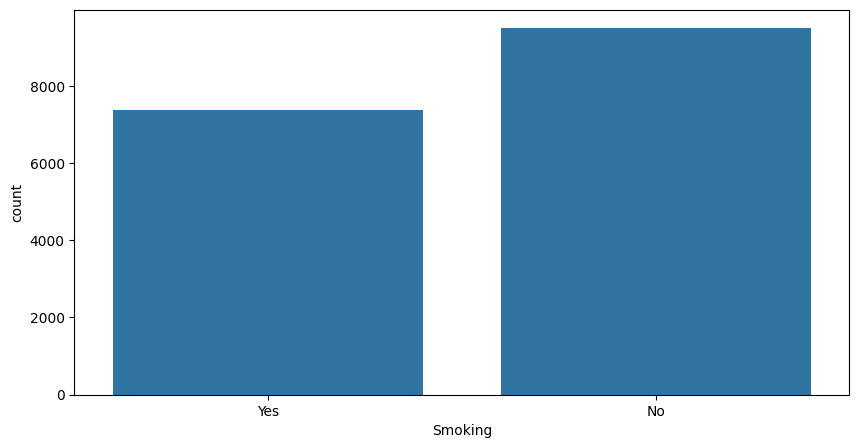

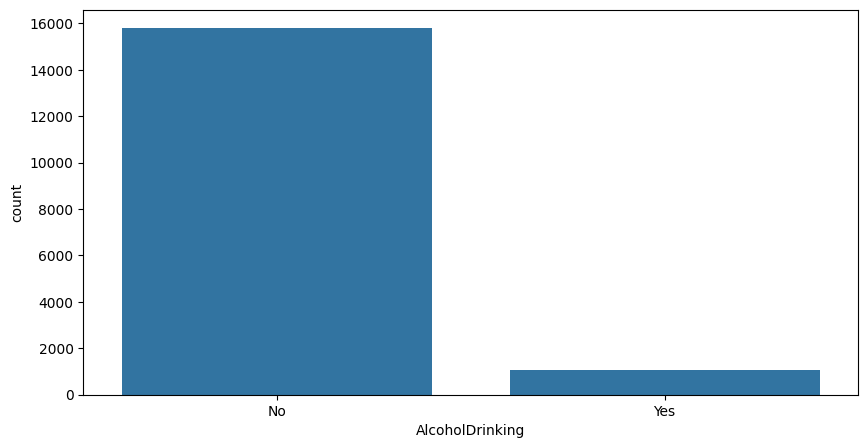

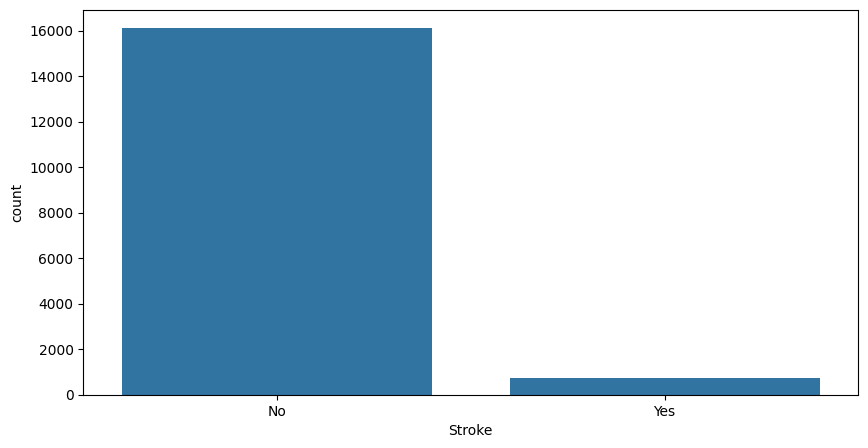

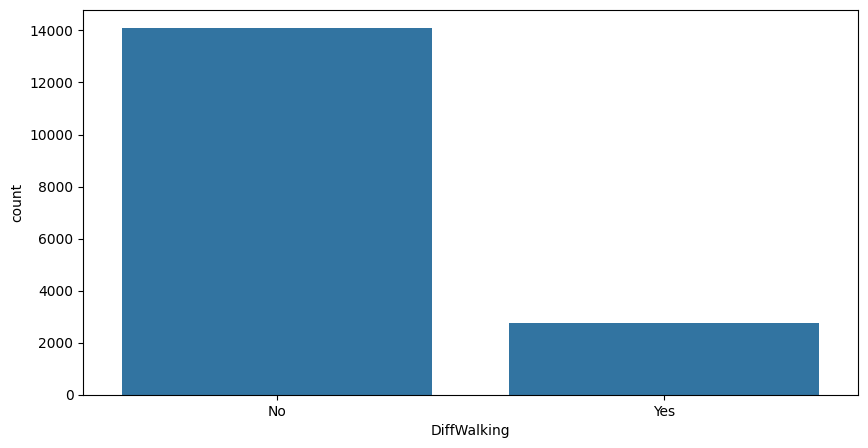

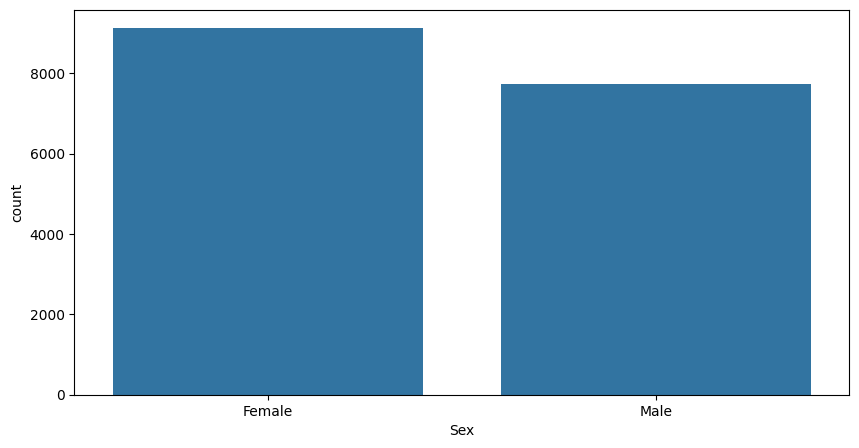

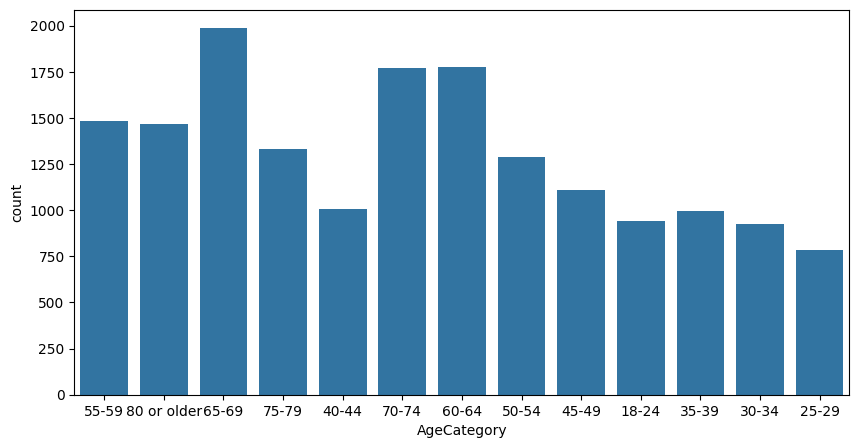

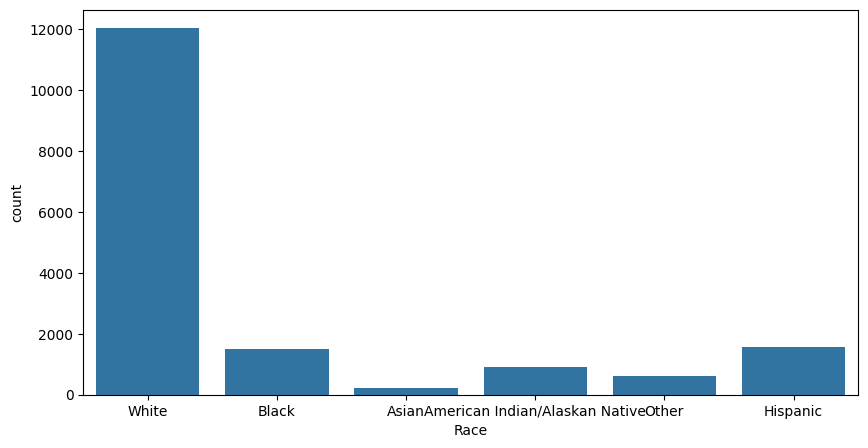

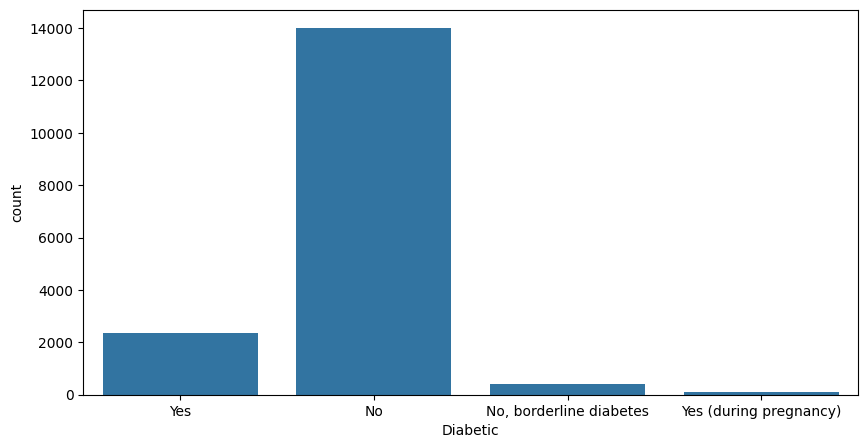

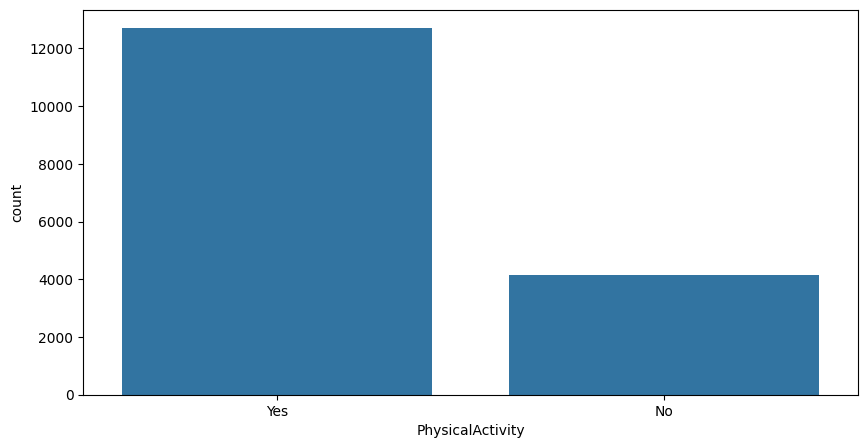

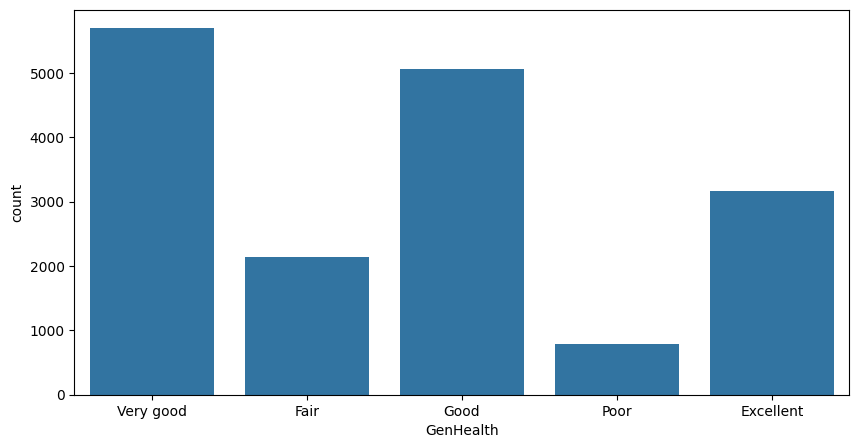

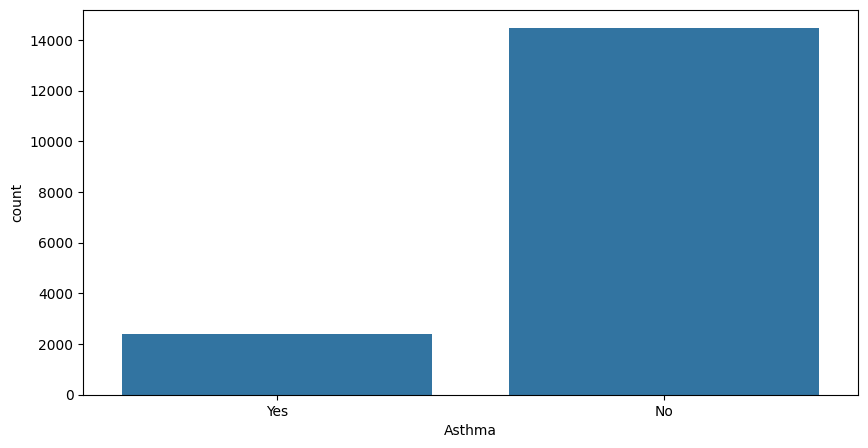

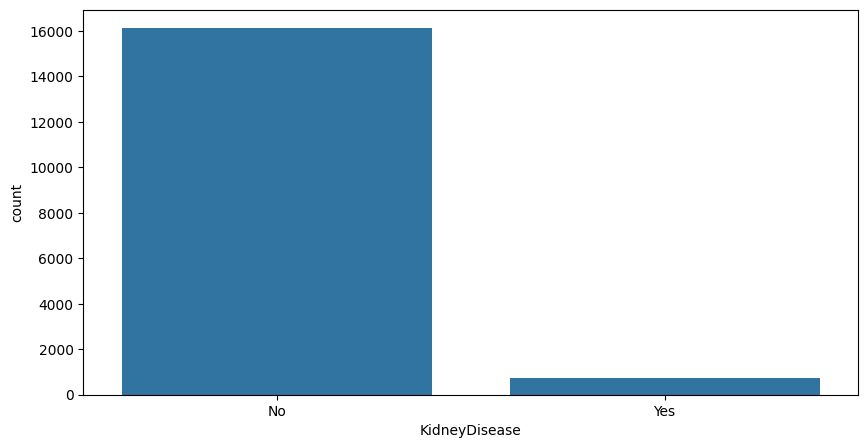

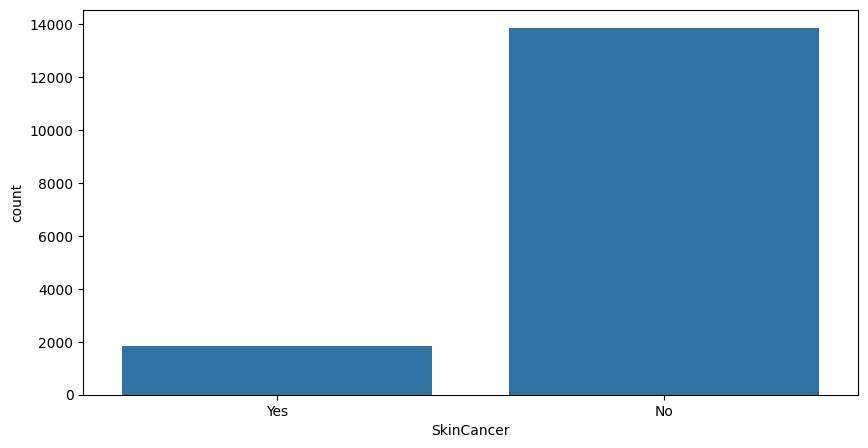

In [12]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col, data=df)

# **There is imbalance in the majority of the categorical features except both sex and smoking**

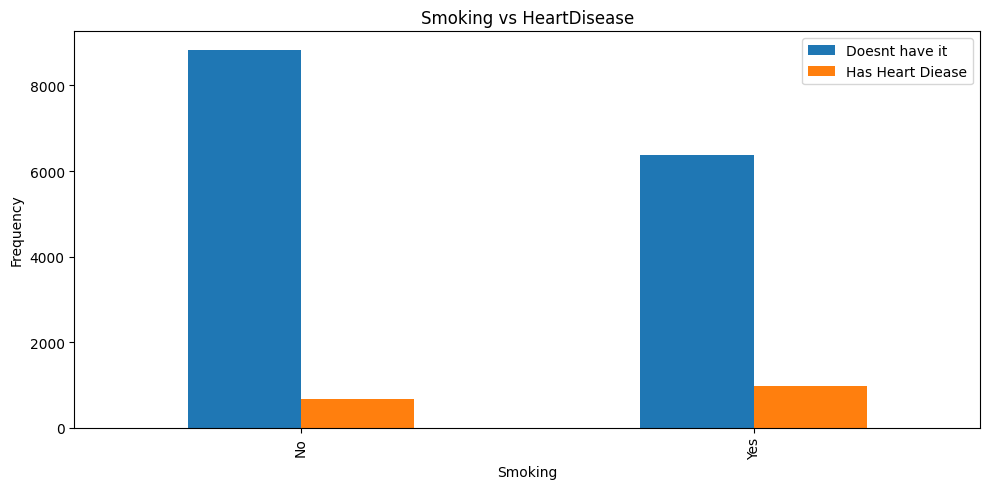

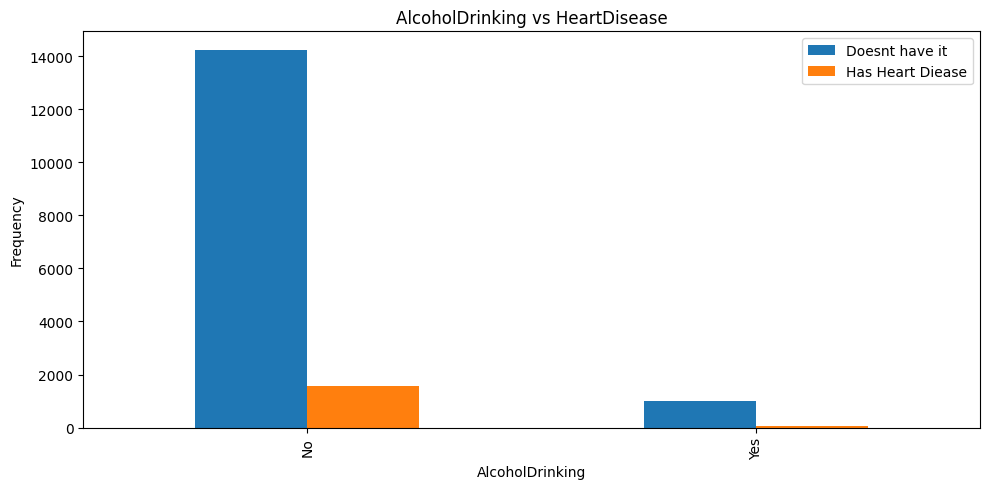

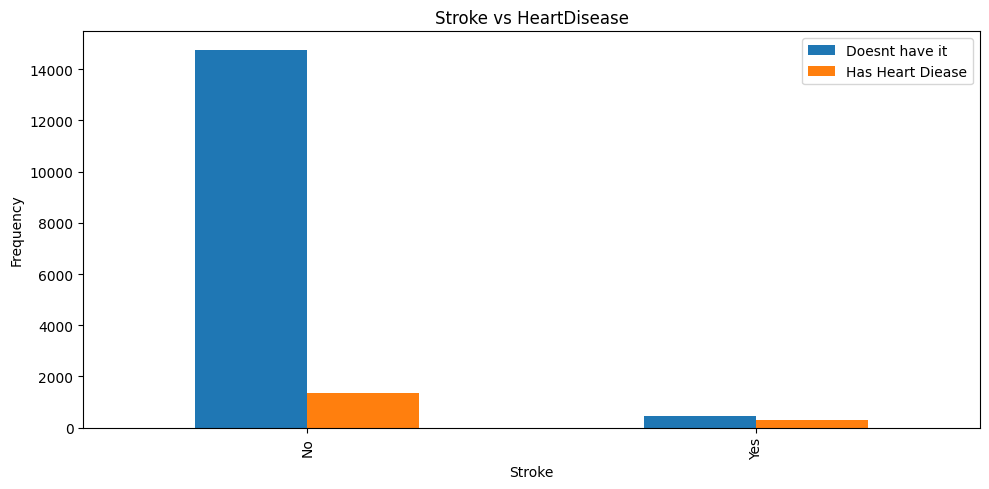

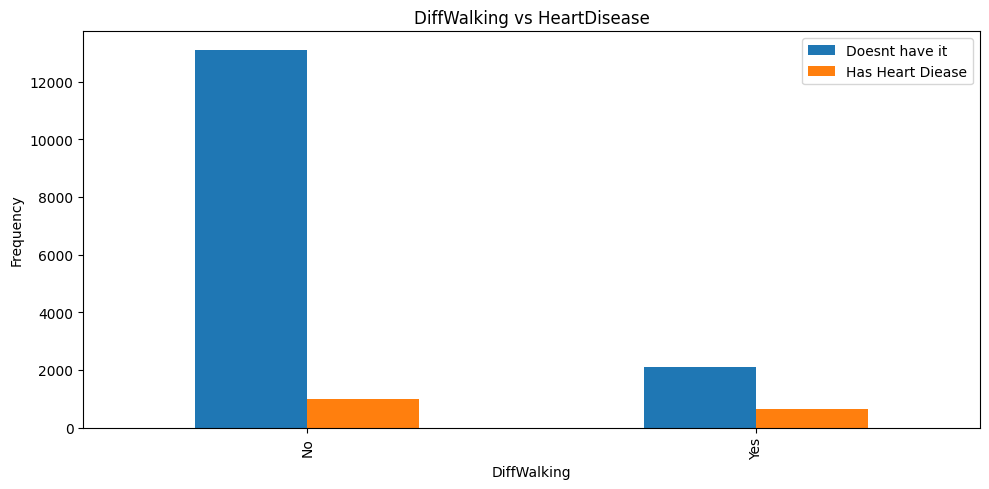

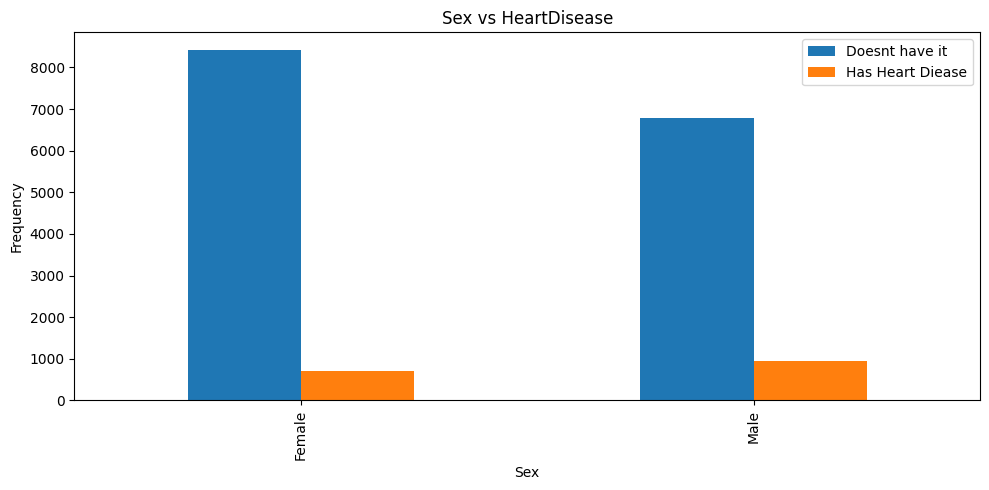

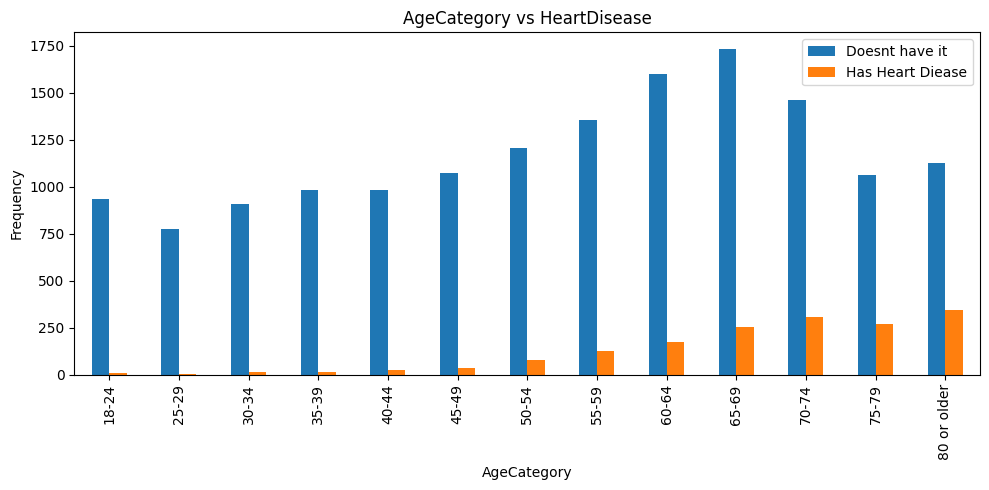

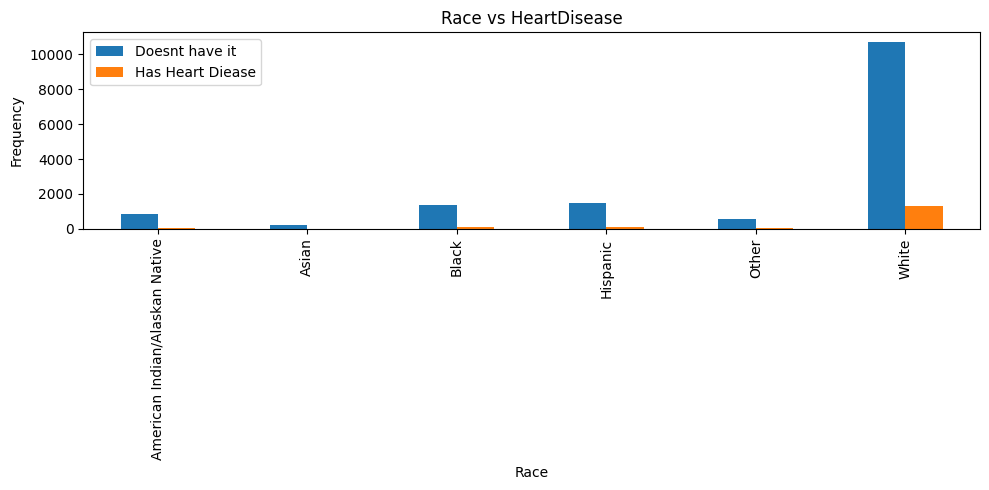

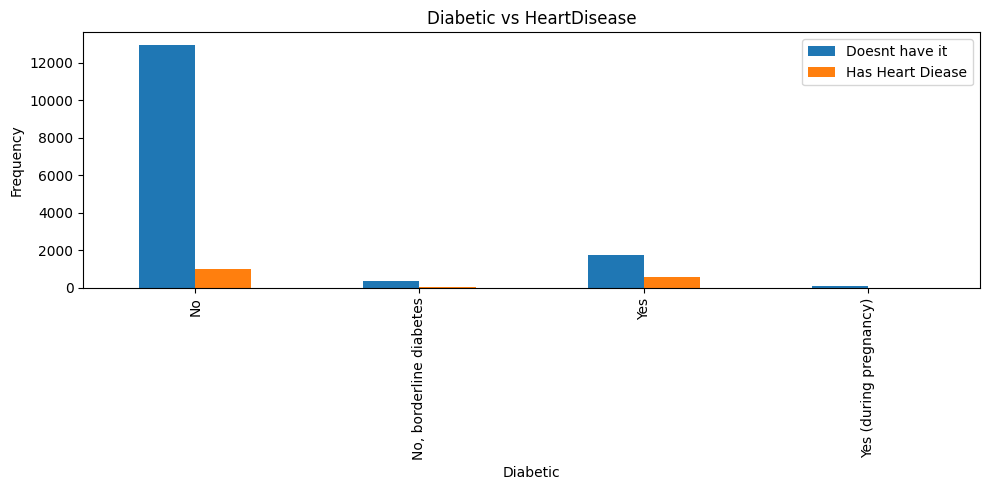

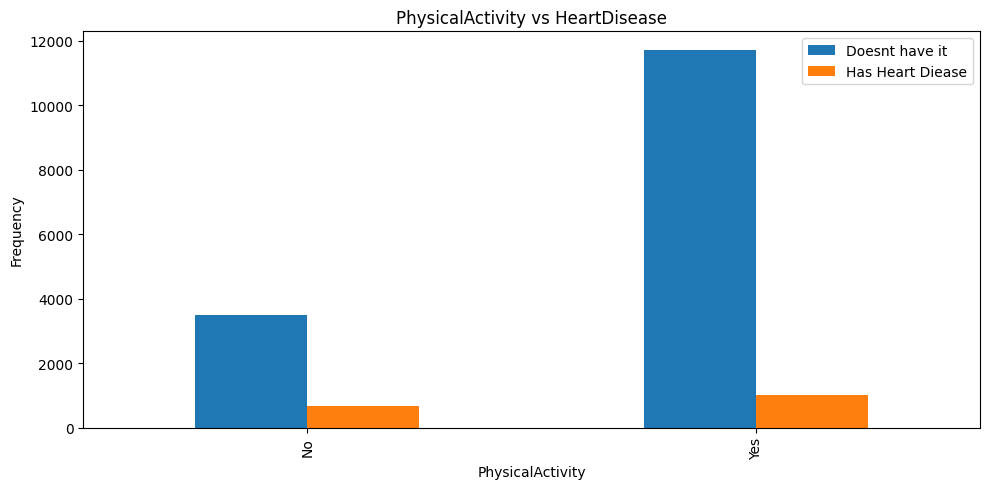

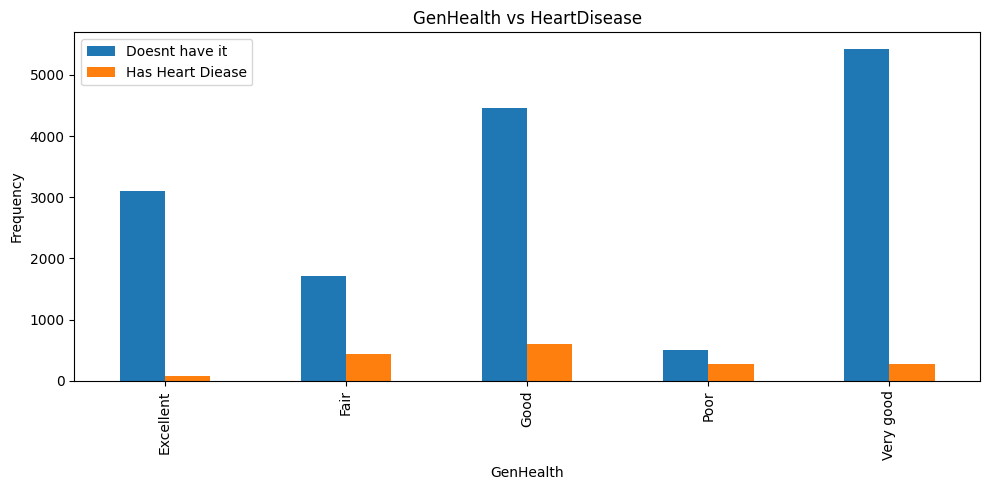

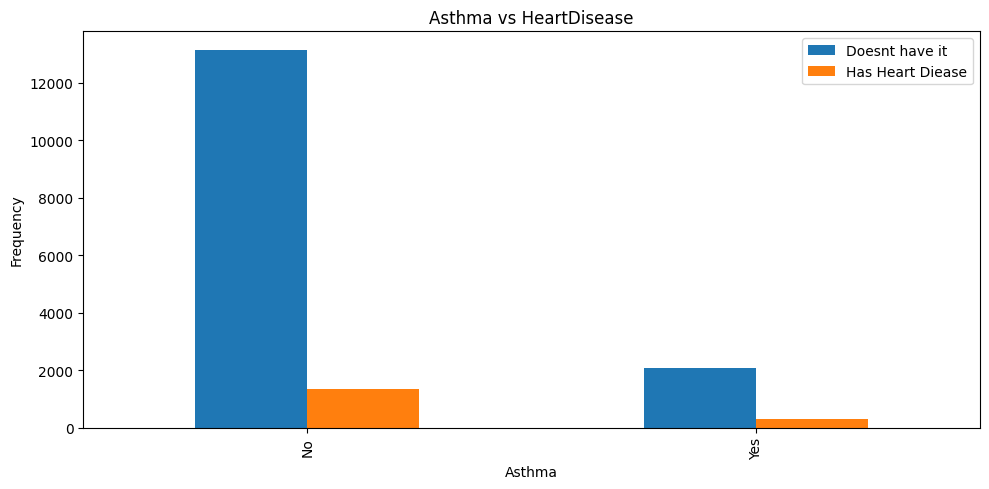

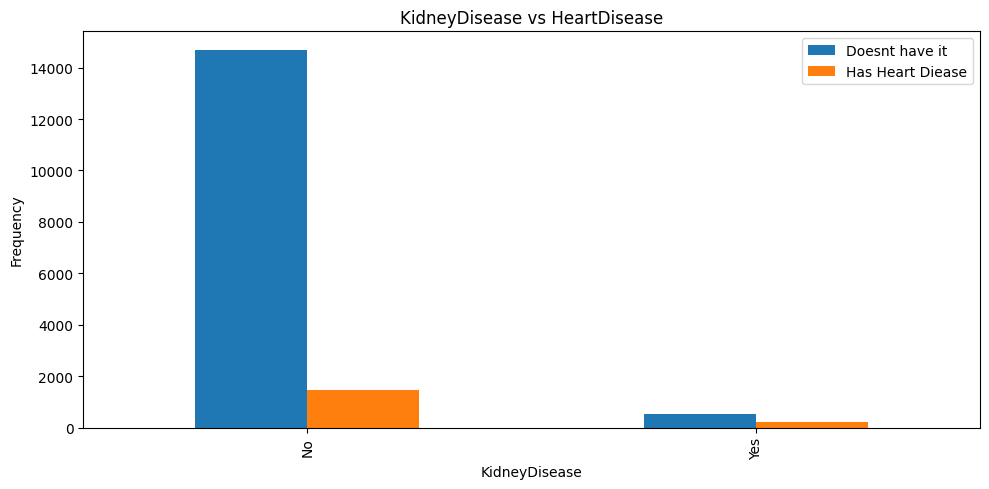

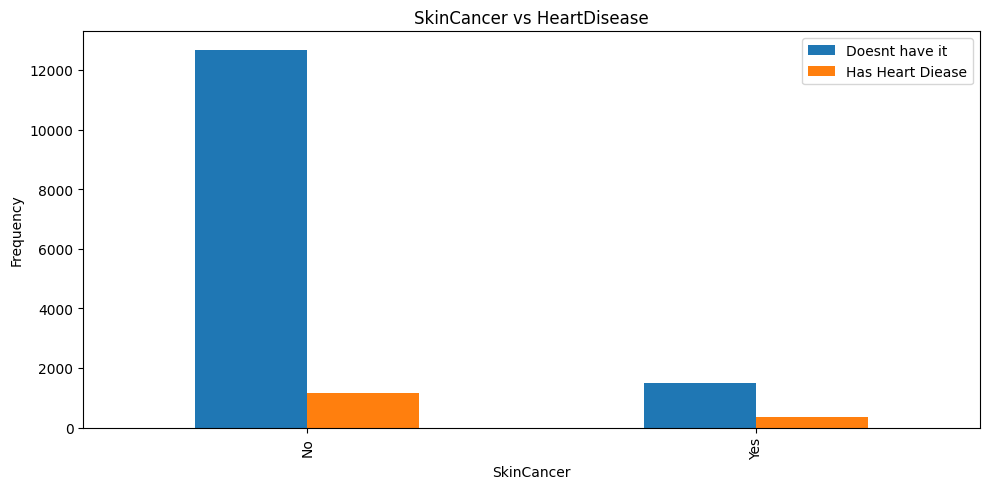

In [13]:
extaracted_cat_features = categorical_features[1:]

for col in extaracted_cat_features:
  plt.figure(figsize=(10,5))

  pd.crosstab(df[col], df['HeartDisease']).plot(
      kind='bar',
      ax=plt.gca()
  )
  plt.title(f'{col} vs HeartDisease')
  plt.ylabel('Frequency')
  plt.xlabel(col)
  plt.legend(['Doesnt have it', 'Has Heart Diease'])
  plt.tight_layout()
  plt.show()

# We can see a rise in heart diesease in white men over 50 and also smoking plays a role